In [1]:
 import pandas as pd

In [ ]:
#menggabungkan data Google Trends dari komoditas: "bawang merah", "bawang putih", "beras", "cabai merah", "cabai rawit", "daging ayam", "daging sapi", "gula", "minyak goreng", "telur ayam", "tepung terigu"


# Baca semua dataset
gt_aceh_bawangmerah = pd.read_csv("Aceh bawang merah.csv")
gt_aceh_bawangputih = pd.read_csv("Aceh bawang putih.csv")
gt_aceh_beras = pd.read_csv("Aceh beras.csv")
gt_aceh_cabaimerah = pd.read_csv("Aceh cabai merah.csv")
gt_aceh_cabairawit = pd.read_csv("Aceh cabai rawit.csv")
gt_aceh_dagingayam = pd.read_csv("Aceh daging ayam.csv")
gt_aceh_dagingsapi = pd.read_csv("Aceh daging sapi.csv")
gt_aceh_gula = pd.read_csv("Aceh gula.csv")
gt_aceh_minyakgoreng = pd.read_csv("Aceh minyak goreng.csv")
gt_aceh_telurayam = pd.read_csv("Aceh telur ayam.csv")
gt_aceh_tepungterigu = pd.read_csv("Aceh tepung terigu.csv")




In [ ]:
import pandas as pd
from functools import reduce
import glob  # Untuk mencari file otomatis

# Cari semua file CSV dalam folder (pastikan ada di direktori kerja)
file_list = glob.glob("Aceh*.csv")  # Semua file yang diawali dengan 'aceh' dan berformat CSV

# Buat list untuk menyimpan semua dataframe
dfs = []

# Loop untuk membaca setiap file CSV
for file in file_list:
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])  # Pastikan kolom tanggal bertipe datetime
    dfs.append(df)

# Gabungkan semua dataframe berdasarkan "tanggal"
df_final = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), dfs)

# Simpan ke CSV jika diperlukan
df_final.to_csv("gt_aceh.csv", index=False)

# Tampilkan hasil
print(df_final.head())


        Date  telur ayam  cabai merah  beras  bawang putih  minyak goreng  \
0 2022-01-01         0.0          NaN    0.0           0.0            0.0   
1 2022-01-02         0.0          NaN    0.0           0.0            0.0   
2 2022-01-03         0.0          NaN    0.0           0.0            0.0   
3 2022-01-04         0.0          NaN    0.0           0.0            0.0   
4 2022-01-05         0.0          NaN    0.0           0.0            0.0   

   cabai rawit  bawang merah       gula  daging sapi  daging ayam  \
0          NaN           NaN   0.000000          0.0          NaN   
1          NaN           NaN   0.000000          0.0          NaN   
2          NaN           NaN  55.023269          0.0          NaN   
3          NaN           NaN   0.000000          0.0          NaN   
4          NaN           NaN   0.000000          0.0          NaN   

   tepung terigu  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [ ]:
#Pada Mata Uang, Adj Close dan Close biasanya sama. Mari kita buktikan dengan melihat korelasi Pearson nya
myrusd = pd.read_csv("MYRUSD=X.csv")
sgdusd = pd.read_csv("SGDUSD=X.csv")
thbusd = pd.read_csv("THBUSD=X.csv")
usdidr = pd.read_csv("USDIDR=X.csv")

In [ ]:
usdidr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          716 non-null    object 
 1   Adj Close     716 non-null    float64
 2   USDIDR Close  716 non-null    float64
 3   High          716 non-null    float64
 4   Low           716 non-null    float64
 5   Open          716 non-null    float64
 6   Volume        716 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.3+ KB


In [ ]:
myrusd['Date'] = pd.to_datetime(myrusd['Date'], dayfirst=True)
sgdusd['Date'] = pd.to_datetime(sgdusd['Date'], dayfirst=True)
thbusd['Date'] = pd.to_datetime(thbusd['Date'], dayfirst=True)
usdidr['Date'] = pd.to_datetime(usdidr['Date'], dayfirst=True)

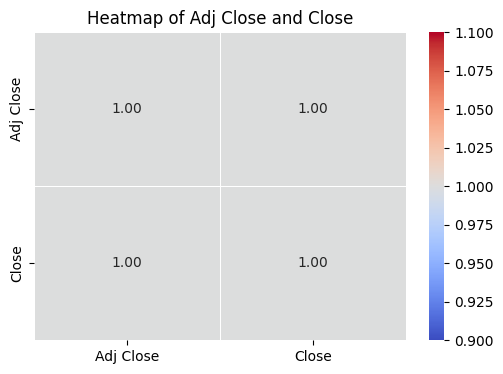

In [ ]:
#heat map kolom "Adj Close" dan  "Close" pada dataset myrusd
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom "Adj Close" dan "Close"
data = usdidr[["Adj Close", "Close"]] #untuk keempat dataset ternyata korelasi antara Adj Close dan Close selalu satu --> TERBUKTI BENAR

# Menghitung korelasi antara kedua kolom
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Adj Close and Close")
plt.show()

In [ ]:
#gabungkan Price dan Change % dengan harga komoditas pangan Aceh bds tanggal
aceh = pd.read_csv("Aceh.csv")
oil = pd.read_csv("Crude Oil WTI Futures Historical Data.csv")


df_merged = aceh.merge(oil[["Date", "Price", ""]],
                            left_on="Date",
                            right_on="Date",
                            how="left")



# Cek hasil gabungan
print(df_merged.head())

df_merged.to_csv("aceh_bawangmerah_new.csv", index=False)

In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      725 non-null    datetime64[ns]
 1   Price     725 non-null    float64       
 2   Open      725 non-null    float64       
 3   High      725 non-null    float64       
 4   Low       725 non-null    float64       
 5   Vol.      689 non-null    object        
 6   Change %  725 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 39.8+ KB


##BAWANG MERAH

In [ ]:
aceh_bawangmerah = pd.read_csv("aceh_bawangmerah_new_new.csv")
aceh_bawangmerah.info()
aceh_bawangmerah['Date'] = pd.to_datetime(aceh_bawangmerah['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             1004 non-null   object 
 1   Google Trends Bawang Merah       638 non-null    float64
 2   MYRUSD Close                     716 non-null    float64
 3   Harga Bahan Pangan Bawang Merah  967 non-null    float64
 4   SGDUSD Close                     716 non-null    float64
 5   THBUSD Close                     716 non-null    float64
dtypes: float64(5), object(1)
memory usage: 47.2+ KB


In [ ]:
aceh_bawangmerah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1004 non-null   datetime64[ns]
 1   Google Trends Bawang Merah       638 non-null    float64       
 2   Harga Bahan Pangan Bawang Merah  967 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.7 KB


In [ ]:
# Gabungkan dataset
df_merged = aceh_bawangmerah.merge(usdidr[["Date", "USDIDR Close"]],
                            left_on="Date",
                            right_on="Date",
                            how="left")



# Cek hasil gabungan
print(df_merged.head())

df_merged.to_csv("aceh_bawangmerah_new.csv", index=False)


        Date  Google Trends Bawang Merah  MYRUSD Close  \
0 2022-01-01                         NaN           NaN   
1 2022-01-02                         NaN           NaN   
2 2022-01-03                         NaN      0.239521   
3 2022-01-04                         NaN      0.239808   
4 2022-01-05                         NaN      0.239006   

   Harga Bahan Pangan Bawang Merah  SGDUSD Close  THBUSD Close  USDIDR Close  
0                          28970.0           NaN           NaN           NaN  
1                          29900.0           NaN           NaN           NaN  
2                          28970.0      0.741730      0.030201   14215.00000  
3                          29600.0      0.739033      0.030082   14283.59961  
4                          29540.0      0.737621      0.030083   14385.50000  


In [ ]:
df_merged.to_csv("aceh_bawangmerah updated.csv", index=False)


In [ ]:
matauang_aceh = pd.read_csv("Aceh.csv")
matauang_aceh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Date                                                1004 non-null   object 
 1   MYRUSD Close                                        716 non-null    float64
 2   SGDUSD Close                                        716 non-null    float64
 3   THBUSD Close                                        716 non-null    float64
 4   USDIDR Close                                        716 non-null    float64
 5   Harga Bahan Pangan Bawang Merah                     967 non-null    float64
 6   Harga Bahan Pangan Bawang Putih                     967 non-null    float64
 7   Harga Bahan Pangan Beras Medium                     967 non-null    float64
 8   Harga Bahan Pangan Beras Premium                    967 non-null    float64
 9

In [ ]:
matauang_aceh_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   MYRUSD Close                                        716 non-null    float64
 1   SGDUSD Close                                        716 non-null    float64
 2   THBUSD Close                                        716 non-null    float64
 3   USDIDR Close                                        716 non-null    float64
 4   Harga Bahan Pangan Bawang Merah                     967 non-null    float64
 5   Harga Bahan Pangan Bawang Putih                     967 non-null    float64
 6   Harga Bahan Pangan Beras Medium                     967 non-null    float64
 7   Harga Bahan Pangan Beras Premium                    967 non-null    float64
 8   Harga Bahan Pangan Cabai Merah Keriting             967 non-null    float64
 9

In [ ]:
print(matauang_aceh_numeric.index)   # Periksa index
matauang_aceh_numeric = matauang_aceh_numeric.reset_index(drop=True)

RangeIndex(start=0, stop=1004, step=1)


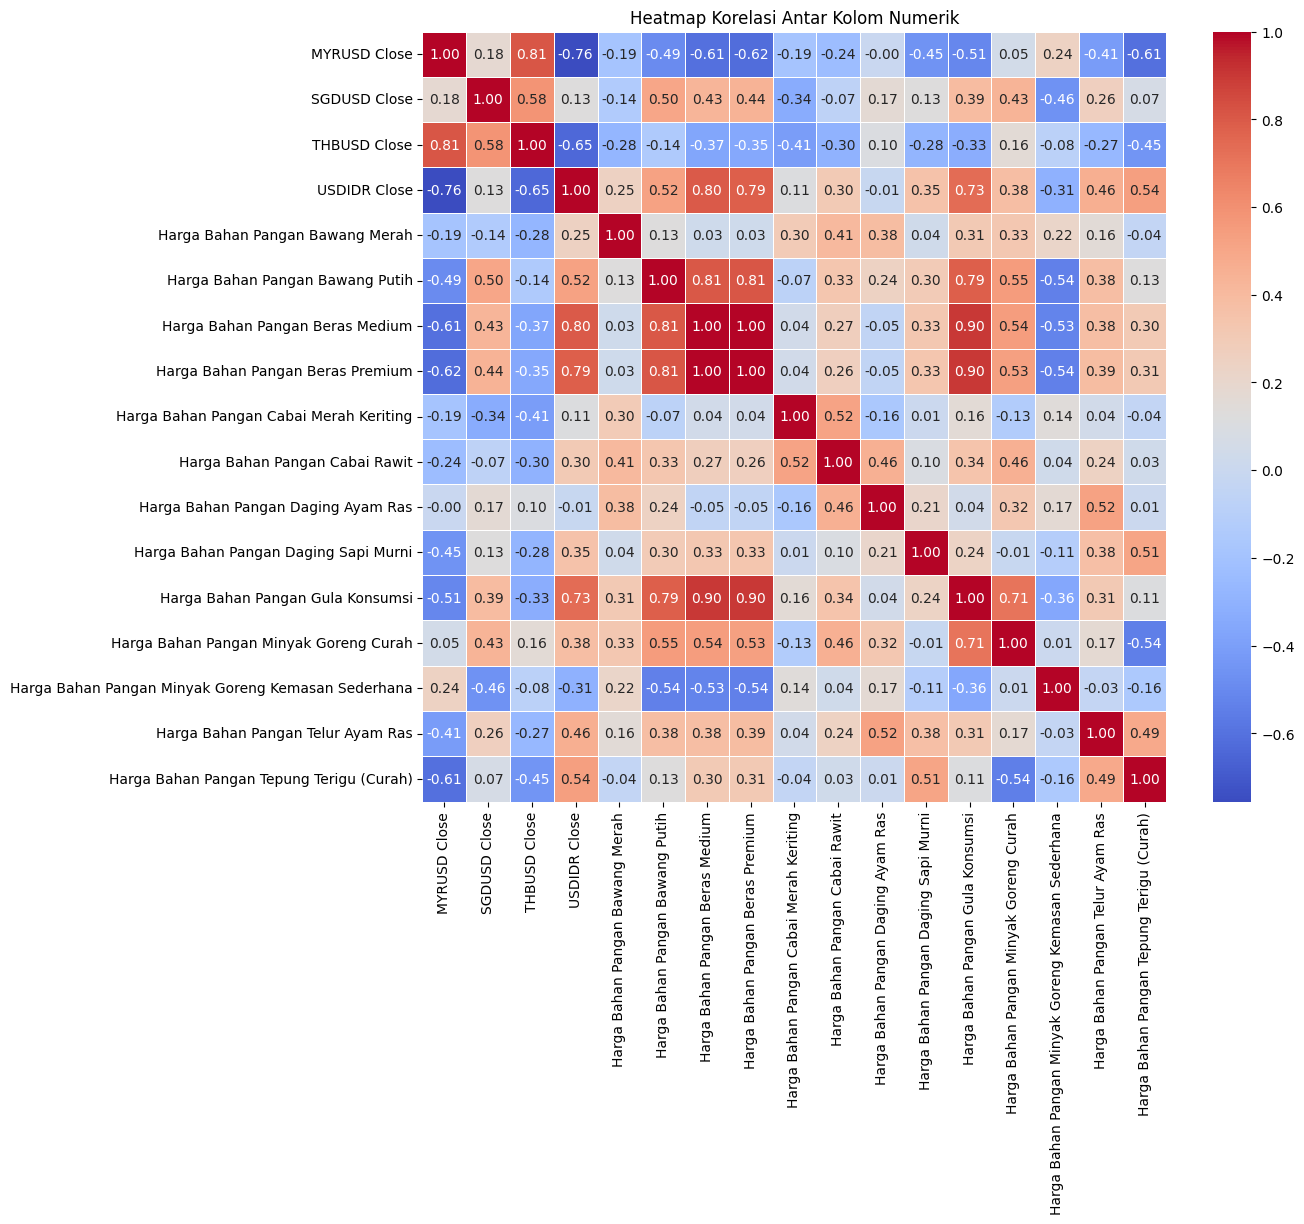

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah kolom 'Date' ke datetime dan jadikan index
matauang_aceh['Date'] = pd.to_datetime(matauang_aceh['Date'], dayfirst=True)
matauang_aceh.set_index('Date', inplace=True)

# Pilih hanya kolom numerik
matauang_aceh_numeric = matauang_aceh_numeric.select_dtypes(include=['float64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(matauang_aceh_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom Numerik")
plt.show()

dari heatmap terlihat bahwa korelasi antara Beras Premium dengan Beras Medium 1, tapi setelah dilihat nilainya, nilai mereka berbeda (jadi bukan data yang sama). artinya, angkanya berbeda tapi pola pergerakannya sama persis.


kedua harga ini penting untuk interpretasi jadi gue memutuskan untuk ga nge drop salah satunya, tapi sadari bahwa satu bisa menggambarkan yang lain dengan sama persis

yang berpengaruh cuma USDIDR, itu pun cuma di bbrp komoditas aja. maka kurs yang lain bakal gue drop

terdapat bbrp komoditas yang korelasinya cukup tinggi, misalnya Gula Konsumsi dengan Beras Premium/Medium, kemudian Bawang Putih dengan Beras Premium/Medium, dan Bawang Putih dengan Gula Konsumsi. Apakah artinya jika saya kekurangan kolom, saya bisa menggunakan, misalnya, data Gula Konsumsi untuk memprediksi harga Bawang Putih?

Ga juga. ketahui bahwa Korelasi ≠ hubungan sebab-akibat. Bisa jadi harga keduanya sama-sama dipengaruhi variabel lain (seperti inflasi atau musim). sebaiknya tambahkan variabel lain seperti harga BBM, kurs dolar, dsb untuk hasil prediksi yang lebih akurat

In [ ]:
df = pd.read_csv("Newcastle Coal Futures Historical Data UK.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [14]:
df.to_csv("Newcastle Coal Updated.csv", index=False)

NameError: name 'df' is not defined

In [15]:
data = pd.read_csv("dataframe (w_o test).csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1004 non-null   object 
 1   USDIDR Close               1004 non-null   float64
 2   Price Crude Oil            1004 non-null   float64
 3   Change % Crude Oil         1004 non-null   float64
 4   Price Natural Gas          1004 non-null   float64
 5   Change % Natural Gas       1004 non-null   float64
 6   Price Newcastle Coal       1004 non-null   float64
 7   Change % Newcastle Coal    1004 non-null   float64
 8   Price Palm Oil             1004 non-null   float64
 9   Change % Palm Oil          1004 non-null   float64
 10  Price US Sugar             1004 non-null   float64
 11  Change % US Sugar          1004 non-null   float64
 12  Price US Wheat             1004 non-null   float64
 13  Change % US Wheat          1004 non-null   float

In [20]:
#drop kolom Date
data = data.drop(columns=['Date'])

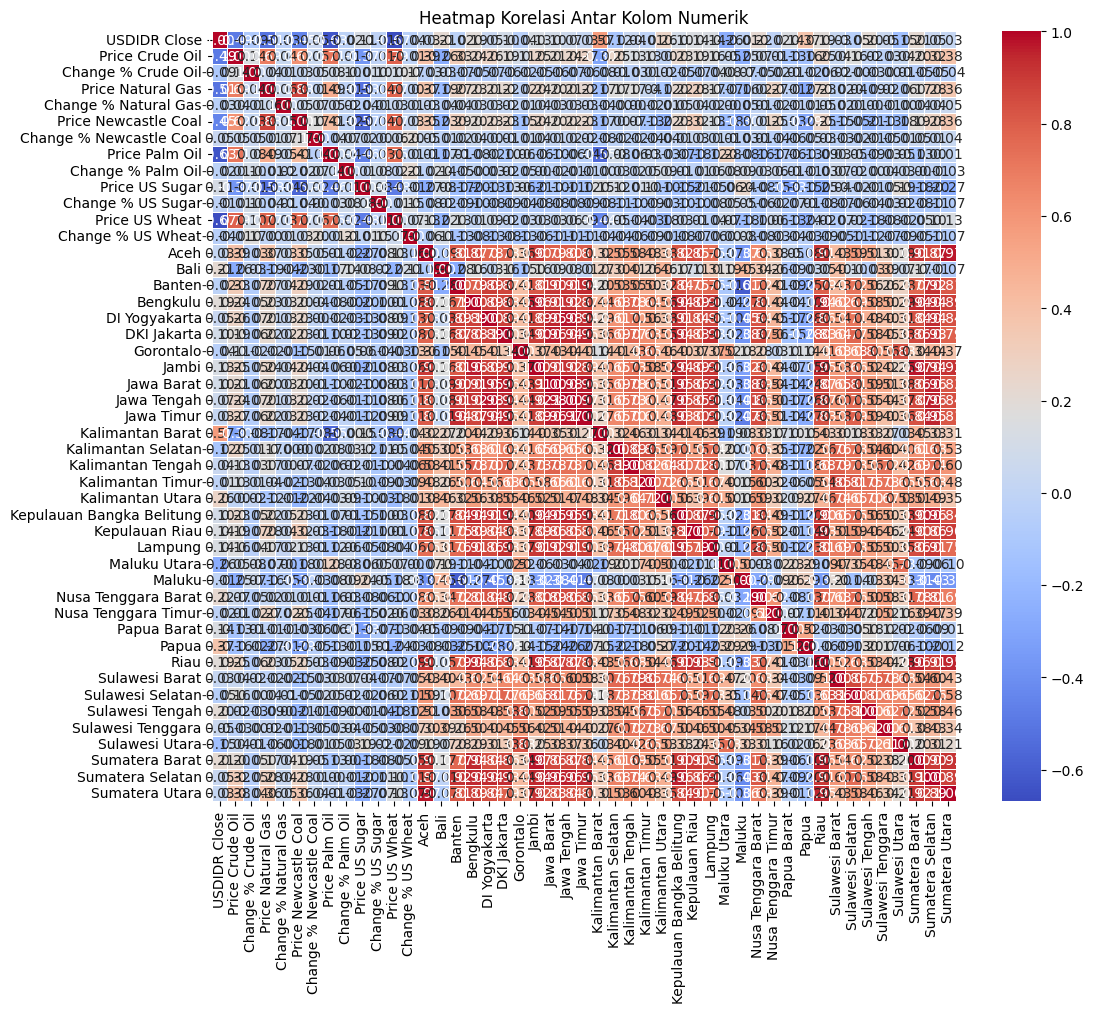

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah kolom 'Date' ke datetime dan jadikan index
#data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
#data.set_index('Date', inplace=True)

# Pilih hanya kolom numerik
data_numeric = data.select_dtypes(include=['float64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom Numerik")
plt.show()

In [26]:
pd.set_option('display.max_columns', None)  # Menampilkan seluruh kolom

In [27]:
data_numeric.corr()

,USDIDR Close,Price Crude Oil,Change % Crude Oil,Price Natural Gas,Change % Natural Gas,Price Newcastle Coal,Change % Newcastle Coal,Price Palm Oil,Change % Palm Oil,Price US Sugar,Change % US Sugar,Price US Wheat,Change % US Wheat,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,Kepulauan Bangka Belitung,Kepulauan Riau,Lampung,Maluku Utara,Maluku,Nusa Tenggara Barat,Nusa Tenggara Timur,Papua Barat,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
USDIDR Close,1.000000,-0.491343,-0.092218,-0.514173,-0.034167,-0.448820,0.046126,-0.630991,-0.018185,0.114337,-0.012952,-0.668921,-0.037662,0.026637,0.212799,-0.018637,0.186991,0.045408,0.095031,-0.039766,0.131747,0.096824,0.071043,0.029308,0.571011,-0.115978,0.044641,-0.006551,0.261595,0.103657,0.139963,0.137972,-0.259109,-0.008502,0.218713,-0.016651,0.141411,0.370703,0.185380,0.031456,-0.047529,0.199747,0.052479,-0.154936,0.213416,0.047598,0.027608
Price Crude Oil,-0.491343,1.000000,0.140477,0.693185,0.037186,0.615316,0.048350,0.714259,0.006235,-0.369984,-0.012961,0.790598,-0.009388,0.391845,-0.264957,0.327927,0.243638,0.263347,0.187474,0.105619,0.254738,0.213586,0.243039,0.265782,-0.299453,0.251075,0.134400,0.125459,0.000561,0.233207,0.185552,0.158676,0.054263,-0.254354,0.073209,0.008886,-0.131017,-0.155909,0.254507,0.040512,0.160610,0.016877,-0.026381,0.041063,0.204342,0.319080,0.380322
Change % Crude Oil,-0.092218,0.140477,1.000000,0.041818,0.013270,0.028251,0.047280,0.081540,0.104205,-0.007666,0.097837,0.100167,0.167562,-0.031481,0.030239,-0.070779,-0.050240,-0.070021,-0.055566,-0.019585,-0.047933,-0.056901,-0.065782,-0.059197,-0.075981,0.009368,-0.031247,0.005141,0.015947,-0.050717,-0.071537,-0.038929,0.082780,0.069533,-0.045292,-0.022654,0.008410,-0.023116,-0.061229,0.022612,-0.003932,-0.030508,-0.002576,0.013830,-0.054709,-0.053488,-0.037839
Price Natural Gas,-0.514173,0.693185,0.041818,1.000000,0.055517,0.877102,0.014303,0.494909,-0.010537,-0.527221,-0.037069,0.774535,0.002441,0.368526,-0.188718,0.267809,0.230426,0.214645,0.216408,-0.015843,0.242086,0.201483,0.211391,0.220968,-0.165212,0.166701,0.171443,0.036614,-0.120486,0.223338,0.283297,0.168896,-0.069842,-0.158245,0.015650,0.267296,-0.011948,-0.266772,0.230381,-0.021239,0.043434,-0.089300,0.021387,-0.060566,0.172072,0.279548,0.355932
Change % Natural Gas,-0.034167,0.037186,0.013270,0.055517,1.000000,0.048654,0.074589,0.052699,0.024737,-0.040684,0.007491,0.029672,0.009208,0.033727,-0.040409,0.039857,0.034879,0.033531,0.022546,-0.006706,0.039238,0.030362,0.034295,0.032565,-0.044021,-0.002637,0.004883,-0.023010,-0.010757,0.046224,0.042911,0.020420,0.004200,-0.050412,0.010377,-0.018000,-0.006655,-0.013198,0.052553,-0.015795,0.006413,0.003793,-0.014925,-0.003488,0.040550,0.038895,0.048667
Price Newcastle Coal,-0.448820,0.615316,0.028251,0.877102,0.048654,1.000000,0.166417,0.414006,-0.016054,-0.571116,-0.040479,0.770854,0.033381,0.351389,-0.227385,0.290568,0.203925,0.231868,0.232551,-0.146158,0.243896,0.202369,0.222951,0.233299,-0.168077,0.001967,0.065271,-0.129527,-0.217547,0.228265,0.318746,0.130741,-0.184056,-0.296344,0.012651,0.254232,-0.033504,-0.288631,0.251253,-0.145553,-0.054238,-0.209426,-0.126152,-0.180399,0.186596,0.275202,0.358261
Change % Newcastle Coal,0.046126,0.048350,0.047280,0.014303,0.074589,0.166417,1.000000,-0.042109,0.067711,0.015765,0.004777,0.055291,0.196049,0.050575,-0.014618,0.015457,0.037147,0.003376,0.009840,-0.011257,0.038127,0.013314,0.022069,0.020322,-0.080329,-0.023054,-0.023465,-0.044913,-0.038185,0.012061,0.032738,0.008029,0.009325,-0.025830,0.012673,-0.037590,-0.058461,-0.049968,0.031554,-0.028444,-0.023184,-0.005942,-0.045738,-0.005279,0.045431,0.014038,0.036777
Price Palm Oil,-0.630991,0.714259,0.081540,0.494909,0.052699,0.414006,-0.042109,1.000000,0.039721,-0.461

In [12]:
data_numeric

,USDIDR Close,Price Crude Oil,Change % Crude Oil,Price Natural Gas,Change % Natural Gas,Price Newcastle Coal,Change % Newcastle Coal,Price Palm Oil,Change % Palm Oil,Price US Sugar,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,14209.39169,75.867127,-1.226089,3.995255,-27.948558,-125.386821,-436.985875,6.601437,3.357832,18.446574,...,86390.0,35800.0,50960.0,41660.0,46480.0,60540.0,48880.0,26990.0,42410.0,26180.0
2022-01-02,14190.20660,76.137177,0.199693,4.031116,-5.028045,57.687037,-156.300483,6.592109,2.630141,18.454580,...,75750.0,34760.0,49550.0,40360.0,45520.0,58830.0,48800.0,26470.0,44750.0,27290.0
2022-01-03,14215.00000,75.850000,1.300000,3.678000,3.400000,157.500000,-7.130000,5.259000,1.940000,18.740000,...,68260.0,35170.0,45980.0,41100.0,46990.0,56570.0,49150.0,27780.0,41320.0,24460.0
2022-01-04,14283.59961,76.740000,1.170000,3.582000,-2.610000,174.100000,10.540000,5.308000,0.930000,18.750000,...,69250.0,35220.0,45630.0,39990.0,46490.0,56630.0,45860.0,29880.0,38530.0,23790.0
2022-01-05,14385.50000,77.470000,0.950000,3.710000,3.570000,179.900000,3.330000,5.437000,2.430000,18.340000,...,66910.0,34140.0,40190.0,39460.0,45330.0,56100.0,44600.0,28320.0,40680.0,24520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,15201.50000,67.190000,-2.810000,2.753000,-2.270000,139.600000,-0.110000,4.235000,2.670000,23.310000,...,62200.0,37980.0,29790.0,26580.0,42260.0,36400.0,35400.0,29640.0,27810.0,24460.0
2024-09-27,15070.00000,67.670000,0.710000,3.304000,20.010000,139.750000,0.110000,4.159000,-1.790000,22.790000,...,57260.0,37680.0,29600.0,26170.0,41610.0,41190.0,36290.0,29700.0,27270.0,24260.0
2024-09-28,14987.74271,67.929305,2.946238,3.020455,60.556350,141.680310,1.424441,4.485364,-8.590171,21.469367,...,59930.0,37740.0,29730.0,25030.0,40750.0,39010.0,36410.0,29460.0,27280.0,23050.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   USDIDR Close               1004 non-null   float64
 1   Price Crude Oil            1004 non-null   float64
 2   Change % Crude Oil         1004 non-null   float64
 3   Price Natural Gas          1004 non-null   float64
 4   Change % Natural Gas       1004 non-null   float64
 5   Price Newcastle Coal       1004 non-null   float64
 6   Change % Newcastle Coal    1004 non-null   float64
 7   Price Palm Oil             1004 non-null   float64
 8   Change % Palm Oil          1004 non-null   float64
 9   Price US Sugar             1004 non-null   float64
 10  Change % US Sugar          1004 non-null   float64
 11  Price US Wheat             1004 non-null   float64
 12  Change % US Wheat          1004 non-null   float64
 13  Aceh                       1004 non-null   float

In [22]:
data_numeric = data.select_dtypes(include=['float64'])

# Menghitung korelasi terhadap target feature
target_feature = "Aceh"
correlations = data[data_numeric].corr()[target_feature].sort_values(ascending=False)

# Print hasil dengan format yang lebih readable
print("\nKorelasi terhadap fitur target:\n")
for feature, value in correlations.items():
    print(f"{feature} = {value:.2f}")

# Visualisasi dalam heatmap fokus ke target feature
plt.figure(figsize=(6, len(data_numeric) * 0.4))
sns.heatmap(correlations.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title(f"Korelasi Fitur dengan {target_feature}")
plt.show()


ValueError: Boolean array expected for the condition, not float64